In [ ]:
斷詞 

繁轉簡(jieba)

-hanzi V

-openCC(未使用)

jieba



篩選法則


In [1]:
import numpy as np
import pandas as pd

import jieba
#import jieba.analyse
import nltk

import csv
import re

In [2]:
stopWords=[]
segments=[]

# 讀入停用詞檔 
# 有少許根據詞頻後來追加
with open('stopWords.txt', 'r', encoding='UTF-8') as file:
    for datastopwords in file.readlines():
        datastopwords = datastopwords.strip()
        stopWords.append(datastopwords)

In [3]:
data_all = pd.read_csv('all_data_simple.csv')

In [4]:
data_all = data_all.drop(data_all.columns[0], axis=1)

In [4]:
data_all.iloc[0]

content    iPhoneX萤幕出现绿色异常情形，包括美国、澳洲、台湾与中国等地区，皆有用户陆续反映回报。...
title         iPhone X 螢幕出現「綠線」異常！全球至少 25 起案例傳出 | 自由電子報 3C科技
class                                                      0
Name: 0, dtype: object

In [ ]:
from hanziconv import HanziConv 
#繁轉簡
for c_cont in range(len(data_all.content)):
    try:
        data_all.content[c_cont]= HanziConv.toSimplified(data_all.content[c_cont])
        if(c_cont%1000==0):
            print(c_cont,'/94473')
      
    except:
        print (c_cont)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0 /94473


In [7]:
data_all.to_csv('../jt071080/all_data_simple.csv',index= False)

In [11]:
b=[[]]
with open('all_data_simple_cut.csv', 'a') as writeFile:
    writer = csv.writer(writeFile, dialect='excel')
    writer.writerows(b)

writeFile.close()

In [5]:
#過濾掉停用詞

def filt(seg_list):
    
    remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', seg_list))

    remainderWords = list(filter(lambda a: len(a)<= 6, remainderWords))

    below3 = re.compile(r'\b[a-zA-Z0-9]{1,3}\b')
    above8 = re.compile(r'\b[a-zA-Z0-9]{8,}\b')
    years = re.compile(r'\b[0-9]{4}\b')

    remainderWords = list(filter(lambda a: not below3.match(a) and 
                                 not above8.match(a) and 
                                 not years.match(a), remainderWords))

    return remainderWords


In [11]:
#main

with open('all_data_simple_cut.csv', 'a') as writeFile:
    writer = csv.writer(writeFile, dialect='excel')
    
    for i in data_all.index:
        try:
            seg_list = jieba.lcut(data_all.content[i], cut_all=False, HMM=True)
            remainderWords = filt(seg_list)
            add_row=[]
            add_row.append(remainderWords)
            writer.writerows(add_row)
            if(i%1000==0):
                print(i,'/94473')
        except:
            print(i)
        
writeFile.close()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.653 seconds.
Prefix dict has been built succesfully.


0 /94473
1000 /94473
2000 /94473
3000 /94473
4000 /94473
5000 /94473
6000 /94473
7000 /94473
8000 /94473
9000 /94473
10000 /94473
11000 /94473
12000 /94473
13000 /94473
14000 /94473
15000 /94473
16000 /94473
17000 /94473
18000 /94473
19000 /94473
20000 /94473
21000 /94473
22000 /94473
23000 /94473
24000 /94473
25000 /94473
26000 /94473
27000 /94473
28000 /94473
29000 /94473
30000 /94473
31000 /94473
32000 /94473
33000 /94473
34000 /94473
35000 /94473
36000 /94473
37000 /94473
38000 /94473
39000 /94473
40000 /94473
41000 /94473
42000 /94473
43000 /94473
44000 /94473
45000 /94473
46000 /94473
47000 /94473
48000 /94473
49000 /94473
50000 /94473
51000 /94473
52000 /94473
53000 /94473
54000 /94473
55000 /94473
56000 /94473
57000 /94473
58000 /94473
59000 /94473
60000 /94473
61000 /94473
62000 /94473
63000 /94473
64000 /94473
65000 /94473
66000 /94473
67000 /94473
68000 /94473
69000 /94473
70000 /94473
71000 /94473
72000 /94473
73000 /94473
74000 /94473
75000 /94473
76000 /94473
77000 /94473

In [6]:
after_split = list(data_all.content)
#after_split = pd.DataFrame(data=data_all.iloc[0:10000])

In [7]:
#main
after_clean=after_split

for i in range(len(after_split)):
    
    after_clean[i] = filt(after_split[i])
    after_split[i] = jieba.lcut(str(after_split[i]), cut_all=False, HMM=True)
    
    if(i%1000==0):
        print(i,'/94473')


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.891 seconds.
Prefix dict has been built succesfully.


0 /94473
3000 /94473
6000 /94473
9000 /94473
12000 /94473
15000 /94473
18000 /94473
21000 /94473
24000 /94473
27000 /94473
30000 /94473
33000 /94473
36000 /94473
39000 /94473
42000 /94473
45000 /94473
48000 /94473
51000 /94473
54000 /94473
57000 /94473
60000 /94473
63000 /94473
66000 /94473
69000 /94473
72000 /94473
75000 /94473
78000 /94473
81000 /94473
84000 /94473
87000 /94473
90000 /94473
93000 /94473


In [10]:
data_all.iloc[203]

content    市场看好苹果AirPods出货表现。凯基投顾分析师郭明錤预估，明年第一季AirPods出货可...
title         AirPods 2018 年 Q1 出貨看佳，下半年傳有新品 | TechNews 科技新報
class                                                      0
new_cut    [[, ', 市, ', ,,  , ', 场, ', ,,  , ', 苹, ', ,, ...
Name: 203, dtype: object

In [9]:
#新的切法
data_all['new_cut']=after_clean

In [16]:
with open('all_data_simple_cut_2.csv', 'w') as writeFile:
    
    data_all.to_csv(writeFile,index= False)
    
writeFile.close()

In [69]:
data_all_cut.shape

(60005, 4)

In [8]:
remainderWords = filt(seg_list)

In [53]:
data_all_cut = pd.read_csv('all_data_simple_cut.csv')

In [11]:
#讀檔
import csv

with open('汽車_網頁資料(10005)_done.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

In [18]:
#簡單詞頻
from collections import Counter

c = Counter()    


for x in range(len(your_list)):   
    for y in your_list[x]:
        if len(y)==1:            
            c[y] += 1    
print('常用词频度统计结果')    
for (k,v) in c.most_common(100):        
    print(k,':',v)



常用词频度统计结果
与 : 42389
将 : 22271
为 : 20006
让 : 16642
会 : 14773
年 : 14749
并 : 13555
后 : 12666
中 : 12268
于 : 11973
车 : 11957
则 : 11057
这 : 10247
还 : 8712
新 : 8659
下 : 8588
时 : 7687
月 : 7496
最 : 7125
从 : 6865
对 : 6646
人 : 6608
来 : 6522
小 : 6404
内 : 6375
前 : 6362
吋 : 5106
高 : 4975
再 : 4918
秒 : 4859
‧ : 4636
▲ : 4632
升 : 4616
已 : 4432
说 : 4148
全 : 4132
万 : 3959
皆 : 3566
着 : 3560
日 : 3437
好 : 3417
式 : 3391
仅 : 3351
却 : 3308
外 : 3286
较 : 3280
双 : 3187
辆 : 3117
款 : 3097
版 : 3044
只 : 2890
约 : 2873
跑 : 2859
台 : 2788
化 : 2774
给 : 2765
过 : 2547
做 : 2544
个 : 2522
需 : 2457
佈 : 2418
型 : 2266
装 : 2263
该 : 2238
图 : 2212
当 : 2083
度 : 2078
　 : 2055
瘾 : 2047
感 : 2027
们 : 1998
元 : 1970
匹 : 1901
想 : 1887
← : 1875
低 : 1783
亦 : 1716
达 : 1644
座 : 1637
请 : 1599
● : 1582
组 : 1528
性 : 1481
曾 : 1446
使 : 1429
没 : 1396
• : 1391
吗 : 1387
厂 : 1350
灯 : 1338
开 : 1308
处 : 1270
无 : 1208
买 : 1186
註 : 1167
连 : 1162
点 : 1150
正 : 1131
太 : 1119
号 : 1110


In [3]:
print(your_list)

['为', '推送', '解读', '最前沿', '最有料', '科技', '创投', '资讯', '一级', '市场', '金融信息', '系统', '服务提供商', '聚集', '全球', '最', '优秀', '创业者', '项目', '融资', '率', '接近', '领跑', '行业']


## 問題小記

duplicate 

CSS


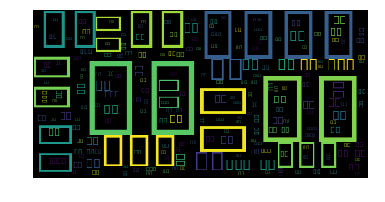

In [5]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for k in range(len(your_list)):
    unique_string=(" ").join(your_list[k])
my_wordcloud = WordCloud().generate(unique_string)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()


In [12]:
詞頻 
分布率

圖表 

關鍵字重疊差異

用keywords

NameError: name '詞頻' is not defined